## 价量关系

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas

<bound method tqdm.pandas of <class 'tqdm.notebook.tqdm_notebook'>>

In [2]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/

/mnt/datadisk2/aglv/aglv/lab_aglv


In [3]:
from forintern.DataDaily import DataDaily
datadily = DataDaily()

load ./data_daily.h5...


In [30]:
close2 = datadily.close
close2

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301588,SZ301589,SZ301591,SZ301596,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240910,10.52,10.30,2.67,6.90,4.86,6.85,12.94,9.11,6.10,11.61,...,18.40,162.35,29.85,61.83,NaN,37.17,27.43,40.08,50.60,29.80
20240911,10.48,10.33,2.62,6.95,4.82,6.86,13.00,9.09,6.10,11.61,...,18.32,160.05,29.58,61.11,61.23,37.27,27.08,36.00,49.45,30.29
20240912,10.43,10.26,2.58,6.95,4.78,6.83,13.08,9.00,6.08,11.51,...,18.00,155.40,29.18,59.25,59.84,36.28,28.20,34.38,48.72,28.88


In [31]:
close2['SZ000001']

date
20171009    11.30
20171010    11.47
20171011    11.53
20171012    11.55
20171013    11.36
            ...  
20240910     9.90
20240911     9.65
20240912     9.74
20240913     9.70
20240918     9.77
Name: SZ000001, Length: 1690, dtype: float64

In [23]:
close = datadily.adjclose

In [25]:
close['SZ000001']

date
20171009    1201.291700
20171010    1219.364200
20171011    1225.742800
20171012    1227.869000
20171013    1207.670200
               ...     
20240910      10.607143
20240911      10.339286
20240912      10.435714
20240913      10.392857
20240918      10.467857
Name: SZ000001, Length: 1690, dtype: float64

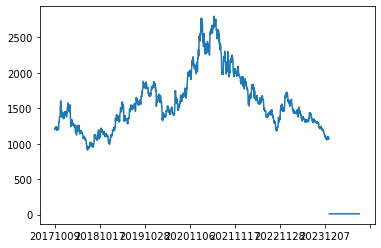

In [27]:
eg1 = close['SZ000001']
eg1.index = [str(i) for i in eg1.index]
eg1.plot()

In [64]:
def get_price_vol(datadaily):
    '''
    获取下面几个函数的数据对象  
    -> MultiIndex对象 level1-InstrumentID level2-date
    '''
    close = datadaily.adjclose.loc[20210101:20231231].T.stack()
    vol = datadaily.volume.loc[20210101:20231231].T.stack()
    data = pd.concat([close, vol], axis=1)
    data.columns = ['close', 'vol']
    
    return data

In [65]:
data = get_price_vol(datadily)
data

close        vol
InstrumentID date                          
BJ430017     20230531  17.804707  153467.88
             20230601  16.725634   54614.77
             20230602  16.921829   27390.99
             20230605  16.709285   14904.59
             20230606  16.627537   11003.27
...                          ...        ...
SZ301568     20231227  37.417994   29027.85
             20231228  37.699268   53146.44
             20231229  38.884029   46111.99
SZ301578     20231228  71.698549   90172.07
             20231229  69.249694   72024.30

[3532614 rows x 2 columns]

In [82]:
data.index.get_level_values('date')

Int64Index([20230531, 20230601, 20230602, 20230605, 20230606, 20230607,
            20230608, 20230609, 20230612, 20230613,
            ...
            20231220, 20231221, 20231222, 20231225, 20231226, 20231227,
            20231228, 20231229, 20231228, 20231229],
           dtype='int64', name='date', length=3532614)

In [83]:
data2 = data.sort_index().loc[(slice(None),slice(20210101,20210201)), :]
data2.groupby(level='InstrumentID').apply(lambda x:x['close'].corr(x['vol'])).iloc[-20:]

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


InstrumentID
SZ300919    0.253867
SZ300920    0.064971
SZ300921    0.754543
SZ300922    0.594094
SZ300923    0.852343
SZ300925    0.284038
SZ300926    0.865550
SZ300927    0.842147
SZ300928    0.941947
SZ300929    0.943391
SZ300930    0.954225
SZ300931    0.954680
SZ300932    0.852270
SZ300933   -0.241682
SZ300935    0.796116
SZ300936    0.977966
SZ300937    0.459761
SZ300938    0.950383
SZ300939    0.982391
SZ300999    0.202852
dtype: float64

In [107]:
eg1 = pd.Series(np.arange(10))
eg2 = np.random.rand(10)
def f(y):
    return eg1.corr(eg1.shift(int(y)))
f(eg2)

TypeError: only size-1 arrays can be converted to Python scalars

In [99]:
np.corrcoef(eg1, eg2)[0, 1]

0.39149032054925986

In [86]:
tqdm.pandas()

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [117]:
def close_vol_shift_corr(data:pd.DataFrame, corr_win=20, shift_win=5):
    data = data.sort_index()
    def corr_shift(i):
        def _handle_stockly(data_daily:pd.DataFrame):
            return data_daily['close'].rolling(corr_win).corr(data_daily['vol'].shift(i))

        return data.groupby(level='InstrumentID').progress_apply(_handle_stockly)
    
    for i in range(shift_win):
        if i == 0:
            factor = corr_shift(i)
        else:
            factor += corr_shift(i)

    factor = factor.unstack(level='date')
    factor.index.names = ['InstrumentID', 's']
    factor = factor.droplevel('s')

    return factor.T

In [118]:
fa_close_vol_shift_corr = close_vol_shift_corr(data)
fa_close_vol_shift_corr

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301529,SZ301533,SZ301548,SZ301550,SZ301555,SZ301558,SZ301559,SZ301566,SZ301568,SZ301578
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,-0.171182,2.755148,1.014423,-0.644491,1.698504,1.315173,-0.138870,-0.554720,-1.092038,0.153726,...,4.307326,1.795193,1.281767,2.963257,0.928499,2.168052,2.535209,NaN,NaN,NaN
20231226,-0.567815,2.679518,1.118453,-1.100027,1.483645,1.966593,-0.409560,-0.226105,-1.654876,-0.304364,...,4.359996,1.205740,0.825944,3.060680,0.296483,2.174887,1.253551,NaN,NaN,NaN
20231227,-0.124518,3.242287,1.451216,-0.771733,1.433803,2.511375,-0.474091,0.123155,-1.430014,0.171404,...,4.217313,0.773490,0.473696,3.144981,0.052405,1.993895,0.448183,NaN,NaN,NaN


In [119]:
fa_close_vol_shift_corr.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/close_vol_shift_corr_cwin_15_swin_5.csv')

In [120]:
datamin = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/data21_23.h5')
datamin = datamin[['Close', 'LastVolume']]
datamin

Close  LastVolume
Date     InstrumentID EndTime                   
20210104 SZ000001     09:31    18.90   3155510.0
                      09:32    18.80   1791334.0
                      09:33    18.84   1656900.0
                      09:34    18.67   2376914.0
                      09:35    18.57   2616000.0
...                              ...         ...
20231012 SH689009     14:56    33.88     23275.0
                      14:57    33.89      9297.0
                      14:58    33.89         0.0
                      14:59    33.89         0.0
                      15:00    33.77     62011.0

[751830321 rows x 2 columns]

In [127]:
def ret_agg_idxmax_volpercent(datamin:pd.DataFrame, agg_num=10):
    def _handle_daily(data_daily:pd.DataFrame):
        def _handle_daily_stockly(data_daily_stock:pd.DataFrame):
            data_daily_stock['Vol'] = data_daily_stock['LastVolume'] / data_daily_stock['LastVolume'].sum()
            data_daily_stock.index = list(range(len(data_daily_stock)))
            data_daily_stock_agg = data_daily_stock.groupby(data_daily_stock.index // agg_num).sum()

            return data_daily_stock_agg['Vol'].loc[data_daily_stock_agg['Close'].idxmax()]

        return data_daily.groupby(level='InstrumentID').apply(_handle_daily_stockly)
        
    return datamin.groupby(level='Date').progress_apply(_handle_daily)

In [128]:
fa_ret_agg_idxmax_volpercent = ret_agg_idxmax_volpercent(datamin)
fa_ret_agg_idxmax_volpercent

KeyboardInterrupt: 